<a href="https://colab.research.google.com/github/Y07-assine/Data-Science-in-health-care/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science in health care.

We will study how to make image recognition of a chest X-ray to provide a diagnosis forecast.

1. Import the needed libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt 
from glob import glob
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from PIL import Image
import cv2
import pathlib
#Classifiers
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

2. Load the data

Images have to be the same size for classification.
Let's create a global variable that will determine the size for image resizing

In [ ]:
IMM_SIZE = 224

We create a function that downloads and displays all the pictures from a specified directory.

In [ ]:
def get_dataset(path,size):
  class_names = [f for f in os.listdir(path) if not f.startswith('.')] # ctreate a list of SubFolders
  data = []
  x_data = []
  y_data = []
  print(class_names)
  for t, f in enumerate(class_names):
        print("Downloading: ", path+'/'+str(f))
        for files in os.walk(path+'/'+str(f), topdown=True):
            file=[files[0]+"/"+fi for fi in files[2] ]
            data.extend(file)

  for i in range(len(data)):
    label = pathlib.PurePath(data[i])
    y_data.append(str(label.parent.name))

  for i in range(len(data)):
    x_data.append(np.array(Image.open(data[i]).convert('RGB').resize((size,size))))   
      
  return np.array(x_data), np.array(y_data)

Let's upload all the images to the corresponding arrays.

In [ ]:
X_train_orig,Y_train_orig=get_dataset("/content/drive/MyDrive/Covid19-dataset/train",IMM_SIZE)
X_test_orig,Y_test_orig=get_dataset("/content/drive/MyDrive/Covid19-dataset/test",IMM_SIZE)

['Viral Pneumonia', 'Covid', 'Normal']
Downloading:  /content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia
Downloading:  /content/drive/MyDrive/Covid19-dataset/train/Covid
Downloading:  /content/drive/MyDrive/Covid19-dataset/train/Normal
['Covid', 'Normal', 'Viral Pneumonia']
Downloading:  /content/drive/MyDrive/Covid19-dataset/test/Covid
Downloading:  /content/drive/MyDrive/Covid19-dataset/test/Normal
Downloading:  /content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia


let's show an example of a labelled image in the dataset

y = Normal


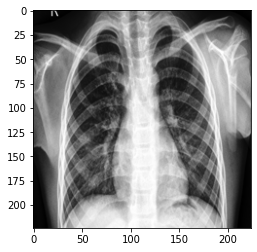

In [ ]:
plt.imshow(X_train_orig[250])
print ("y = " + str(np.squeeze(Y_train_orig[250])))

y = Covid


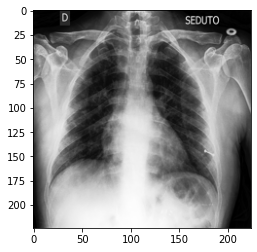

In [ ]:
plt.imshow(X_train_orig[70],cmap='gray')
print ("y = " + str(np.squeeze(Y_train_orig[70])))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


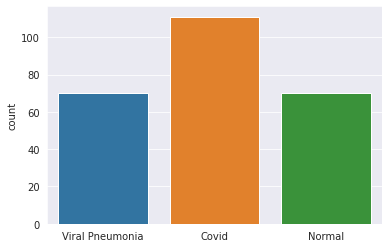

In [ ]:
l = []
for i in Y_train_orig:
    l.append(i)
sns.set_style('darkgrid')
sns.countplot(l)

Examine the shapes of our data

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train_orig.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test_orig.shape))

number of training examples = 251
number of test examples = 66
X_train shape: (251, 224, 224, 3)
Y_train shape: (251,)
X_test shape: (66, 224, 224, 3)
Y_test shape: (66,)


#Comparing different classification methods

First, let's create our dataset features. We use numpy.ravel() to transforme 225*225 array into 1D

In [ ]:
from sklearn.utils import shuffle

X_train_orig,Y_train_orig = shuffle(X_train_orig,Y_train_orig)
X_test_orig,Y_test_orig = shuffle(X_test_orig,Y_test_orig)



In [ ]:
x_train = []
for i in X_train_orig:
  x_train.append(i.ravel())

x_train = np.array(x_train)
x_test = []
for i in X_test_orig:
  x_test.append(i.ravel())

x_test = np.array(x_test)

Let's start by LogisticRegression

Training DataSet accuracy:  100.0% Test DataSet accuracy:  90.9%


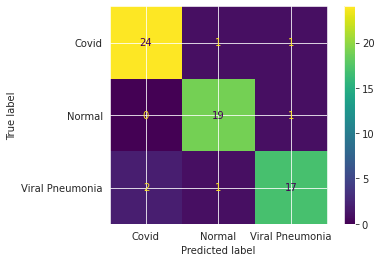

In [ ]:
clf = Pipeline([('preproc', StandardScaler()), ('classifier', LogisticRegression())])
clf.fit(x_train, Y_train_orig)
scores_train = clf.score(x_train, Y_train_orig)
scores_test = clf.score(x_test, Y_test_orig)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))
plot_confusion_matrix(clf, x_test, Y_test_orig)  
plt.show() 

Confusion matix shows us how many mistaken predictions we got.

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest","Naive Bayes"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]
scores_train = []
scores_test = []
for name, clf in zip(names, classifiers):
    clf = Pipeline([('preproc', StandardScaler()), ('classifier', clf)])
    clf.fit(x_train, Y_train_orig)
    score_train = clf.score(x_train, Y_train_orig)
    score_test = clf.score(x_test, Y_test_orig)
    scores_train.append(score_train)
    scores_test.append(score_test)

Let's print the results as a table

In [ ]:
res = pd.DataFrame(index = names)
res['scores_train'] = scores_train
res['scores_test'] = scores_test
res.columns = ['Train','Test']
res.index.name = "Classifier accuracy"
pd.options.display.float_format = '{:,.2f}'.format
print(res)

                     Train  Test
Classifier accuracy             
Logistic Regression   1.00  0.91
Nearest Neighbors     0.94  0.74
Linear SVM            1.00  0.92
RBF SVM               1.00  0.39
Decision Tree         1.00  0.62
Random Forest         0.96  0.74
Naive Bayes           0.94  0.76


We can see that Logistic Regression show the best result and linear SVM show the best result for the test Dataset

Now, let's compare the results on plot

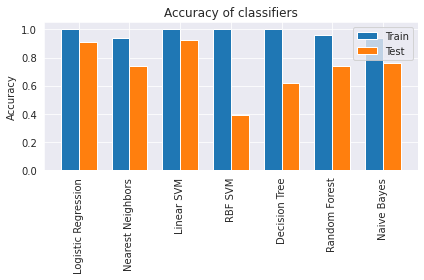

In [ ]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_train, width, label='Train')
rects2 = ax.bar(x + width/2, scores_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of classifiers')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(names)
ax.legend()

fig.tight_layout()

plt.show()

#Convolutional Neural Network

Import the needed packages

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

1. Create the Dataset and Split it into Training and Validation Sets



In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y_test_orig = le.fit_transform(Y_test_orig)
Y_train_orig = le.fit_transform(Y_train_orig)

In [ ]:
# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(Y_train_orig)):
    lab[l] = i


y_train = np.array([lab[l] for l in Y_train_orig])
y_val = np.array([lab[l] for l in Y_test_orig])

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_test = Y_test_orig.reshape((1,Y_test_orig.shape[0]))
Y_train = Y_train_orig.reshape((1,Y_train_orig.shape[0]))
Y_train = np.eye(3)[Y_train.reshape(-1)]
Y_test = np.eye(3)[Y_test.reshape(-1)]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 251
number of test examples = 66
X_train shape: (251, 224, 224, 3)
Y_train shape: (251, 3)
X_test shape: (66, 224, 224, 3)
Y_test shape: (66, 3)


Now let's take a look at some of the images from the training set:

y = 2


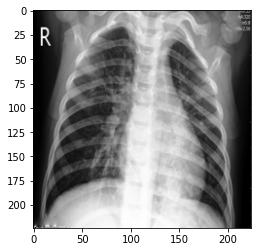

In [ ]:
index = 6
plt.imshow(X_train_orig[index],cmap='gray')
print ("y = " + str(np.squeeze(Y_train_orig[index])))

Data augmentation on training data

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

Model defining

Let’s define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. A dropout layer is added after the 3rd maxpool operation to avoid overfitting.

In [ ]:
model = Sequential()
model.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(IMM_SIZE,IMM_SIZE,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 1, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 1, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

Let’s compile the model now using Adam as our optimizer and categorical_crossentropy as the loss function

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt ,loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
fitting = True
fitting_save = True
epochs = 2000

import pickle

if fitting:
    history = model.fit(X_train,Y_train,epochs=epochs,validation_data = (X_test,Y_test),shuffle=True)
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("model.h5")
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
        with open('lab.pickle', 'wb') as f:
            pickle.dump(lab, f)
# load model  
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into a new model
model.load_weights("model.h5")        
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/2000
8/8 [==============================] - 32s 164ms/step - loss: 1.1147 - accuracy: 0.2908 - val_loss: 1.0939 - val_accuracy: 0.3030
Epoch 2/2000
8/8 [==============================] - 1s 69ms/step - loss: 1.1022 - accuracy: 0.2829 - val_loss: 1.0880 - val_accuracy: 0.3788
Epoch 3/2000
8/8 [==============================] - 1s 71ms/step - loss: 1.0924 - accuracy: 0.3386 - val_loss: 1.0829 - val_accuracy: 0.6212
Epoch 4/2000
8/8 [==============================] - 1s 73ms/step - loss: 1.0921 - accuracy: 0.3825 - val_loss: 1.0785 - val_accuracy: 0.4697
Epoch 5/2000
8/8 [==============================] - 1s 73ms/step - loss: 1.0808 - accuracy: 0.4343 - val_loss: 1.0749 - val_accuracy: 0.4242
Epoch 6/2000
8/8 [==============================] - 1s 71ms/step - loss: 1.0733 - accuracy: 0.5219 - val_loss: 1.0716 - val_accuracy: 0.4242
Epoch 7/2000
8/8 [==============================] - 1s 69ms/step - loss: 1.0694 - accuracy: 0.5139 - val_loss: 1.0686 - val_accuracy: 0.4091
Epoch 8/200

Results evaluation

We will plot our training and validation accuracy along with the training and validation loss.

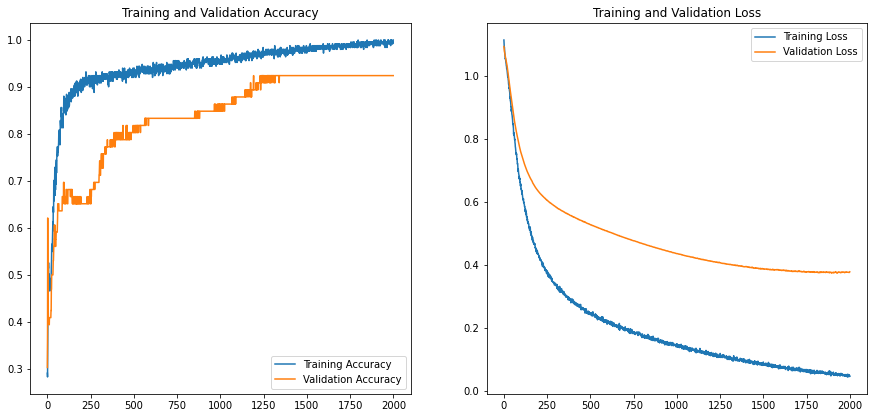

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let’s see what the curve looks like.
You can see that the accuracy of the training and validation sets is the same. The loss function of validation and training sets is stable. It means that our CNN is fitted well and can be used for classification.

#Using  bigger dataset

We will use the same CNN model using in the previous section on a bigger dataset

1. Import the dataset

In [ ]:
X,Y=get_dataset("/content/drive/MyDrive/COVID-19_Radiography_Dataset",112)

['COVID', 'Normal', 'Viral Pneumonia']
Downloading:  /content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID
Downloading:  /content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal
Downloading:  /content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia


Shuffle the Dataset and Split it into Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X,Y= shuffle(X,Y)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, Y, test_size=0.2, random_state=42,)

Convolutional Neural Network

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y_test_orig = le.fit_transform(y_test_orig)
Y_train_orig = le.fit_transform(y_train_orig)

In [ ]:
# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(Y_train_orig)):
    lab[l] = i

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_test = Y_test_orig.reshape((1,Y_test_orig.shape[0]))
Y_train = Y_train_orig.reshape((1,Y_train_orig.shape[0]))
Y_train = np.eye(3)[Y_train.reshape(-1)]
Y_test = np.eye(3)[Y_test.reshape(-1)]
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 12138
number of test examples = 3035
X_train shape: (12138, 112, 112, 3)
Y_train shape: (12138, 3)
X_test shape: (3035, 112, 112, 3)
Y_test shape: (3035, 3)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(112,112,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 1, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 1, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

In [ ]:
model.compile(optimizer = 'Adam' ,loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(512)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(512)

In [ ]:
fitting = True
fitting_save = True
epochs = 100

import pickle

if fitting:
    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("model.h5")
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
        with open('lab.pickle', 'wb') as f:
            pickle.dump(lab, f)
# load model  
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into a new model
model.load_weights("model.h5")        
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/100
24/24 [==============================] - 82s 3s/step - loss: 0.8336 - accuracy: 0.6648 - val_loss: 0.7119 - val_accuracy: 0.6577
Epoch 2/100
24/24 [==============================] - 80s 3s/step - loss: 0.6305 - accuracy: 0.6949 - val_loss: 0.5868 - val_accuracy: 0.7068
Epoch 3/100
24/24 [==============================] - 80s 3s/step - loss: 0.5557 - accuracy: 0.7314 - val_loss: 0.5331 - val_accuracy: 0.7446
Epoch 4/100
24/24 [==============================] - 80s 3s/step - loss: 0.5162 - accuracy: 0.7664 - val_loss: 0.4942 - val_accuracy: 0.7832
Epoch 5/100
24/24 [==============================] - 80s 3s/step - loss: 0.4730 - accuracy: 0.7960 - val_loss: 0.4397 - val_accuracy: 0.8066
Epoch 6/100
24/24 [==============================] - 80s 3s/step - loss: 0.4265 - accuracy: 0.8183 - val_loss: 0.4027 - val_accuracy: 0.8234
Epoch 7/100
24/24 [==============================] - 80s 3s/step - loss: 0.3952 - accuracy: 0.8331 - val_loss: 0.3856 - val_accuracy: 0.8303
Epoch 8/100
2

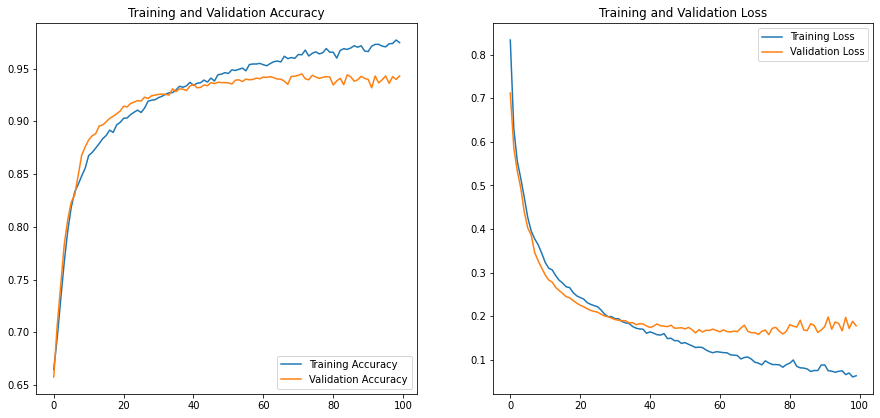

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()